# Huggingface Segformer

In [1]:
# 가상환경 만들기

# pytorch 설치
# transformers 설치

In [24]:
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
from PIL import Image
import requests

# processor = SegformerImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
feature_extractor = SegformerImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)
print(logits)

tensor([[[[ -4.6309,  -5.5232,  -6.2356,  ...,  -4.9868,  -4.7341,  -4.6612],
          [ -5.1921,  -6.1444,  -6.5996,  ...,  -5.1771,  -5.0288,  -5.1761],
          [ -5.4424,  -6.2790,  -6.7574,  ...,  -5.2748,  -5.1669,  -5.0999],
          ...,
          [ -8.5836,  -9.0887,  -9.5409,  ...,  -8.7190,  -8.5183,  -8.3098],
          [ -8.4320,  -8.8555,  -9.1848,  ...,  -7.7831,  -7.4822,  -7.3598],
          [ -8.3225,  -8.8764,  -9.1849,  ...,  -7.1564,  -6.8759,  -6.6428]],

         [[-12.1391, -13.3122, -13.9554,  ..., -11.8693, -11.5761, -11.3418],
          [-12.8732, -13.9352, -14.3563,  ..., -12.3348, -12.1524, -12.3176],
          [-12.9438, -13.8226, -14.2513,  ..., -12.3360, -12.3081, -12.2396],
          ...,
          [-13.9108, -14.2715, -14.6169,  ..., -13.2829, -13.3424, -13.3222],
          [-13.8718, -14.2715, -14.3808,  ..., -12.5270, -12.4334, -12.3057],
          [-13.6848, -14.2857, -14.5154,  ..., -11.8523, -11.8534, -11.6054]],

         [[-12.5134, -13.4686,

In [22]:
logits.shape

torch.Size([1, 150, 128, 128])

TypeError: Invalid shape (150, 128, 128) for image data

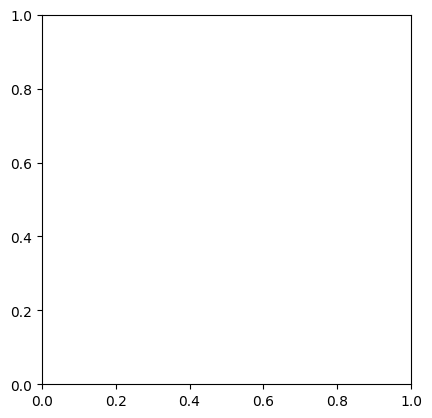

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import torch

logits = torch.squeeze(logits)
logits = logits.detach().numpy()
# np.uns
# logits = np.reshape(logits,(-1,150,128,128))
plt.imshow(logits)